In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

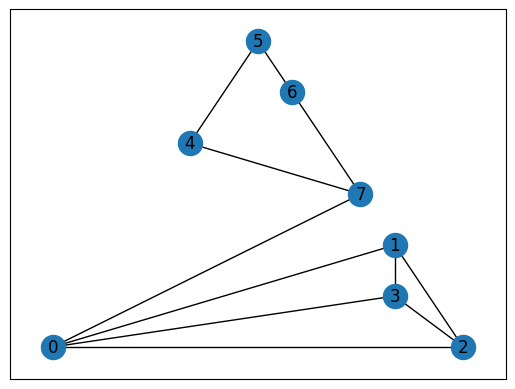

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


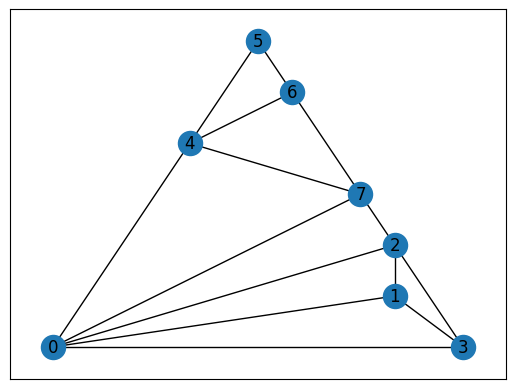

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


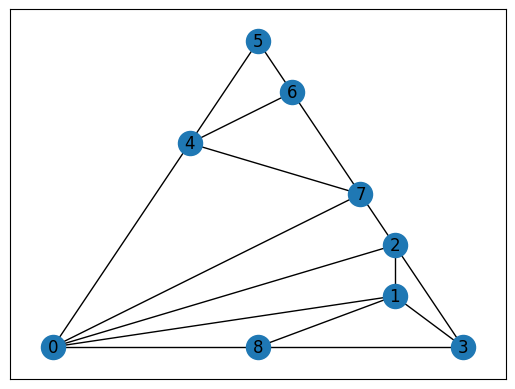

In [4]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [5]:
p.find_cips()
p.b.cips

[[0, 8, 3, 2], [4, 5, 6]]

In [6]:
p.start_four_connect()

In [7]:
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 4, 5], 'name': None, 'node': 9, 'location': None, 'mean_location': None}),
 1: CornerNode({'interior_nodes': [5, 6, 2], 'name': None, 'node': 10, 'location': None, 'mean_location': None}),
 2: CornerNode({'interior_nodes': [2, 3, 8], 'name': None, 'node': 11, 'location': None, 'mean_location': None}),
 3: CornerNode({'interior_nodes': [8, 0], 'name': None, 'node': 12, 'location': None, 'mean_location': None})}

In [8]:
# p.b.direction_dict

In [9]:
p.b.locate_corner_nodes()

ic| f"NEW COORD {coord}": 'NEW COORD (-0.5402298850574713, 0.09770114942528735)'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'north'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'south'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'east'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'west'
ic| f"NEW COORD {coord}": 'NEW COORD (0.2873563218390804, -0.27011494252873564)'
ic| coord: (0.2873563218390804, -0.27011494252873564), 'south'
ic| coord: (0.2873563218390804, -0.27011494252873564), 'east'
ic| f"NEW COORD {coord}": 'NEW COORD (0.05747126436781608, 0.23563218390804597)'
ic| coord: (0.05747126436781608, 0.23563218390804597), 'north'
ic| f"NEW COORD {coord}": 'NEW COORD (-0.5862068965517242, -0.3620689655172414)'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'south'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'west'
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.057471264367816

In [10]:
for k, v in p.b.direction_dict.items():
    ic(p.b.direction_dict[k])

ic| p.b.direction_dict[k]: (0.05747126436781608, 0.23563218390804597)
ic| p.b.direction_dict[k]: (-0.5862068965517242, -0.3620689655172414)
ic| p.b.direction_dict[k]: (0.2873563218390804, -0.27011494252873564)
ic| p.b.direction_dict[k]: (-0.5402298850574713, 0.09770114942528735)


In [11]:
list({(-0.5402298850574713, 0.09770114942528735)})[0]

(-0.5402298850574713, 0.09770114942528735)

In [12]:
p.b.four_con[get_key_by_value(p.b.four_con, p.b.direction_dict["east"], object=True)]

CornerNode({'interior_nodes': [2, 3, 8], 'name': 'east', 'node': 11, 'location': (1.2873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)})

In [13]:
d = {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5862068965517242, -0.3620689655172414)}

In [14]:
list(find_keys_with_same_value(d).values())[0]

['south', 'west']

In [15]:
find_keys_with_same_value(d)

{(-0.5862068965517242, -0.3620689655172414): ['south', 'west']}

In [16]:
coords = [v.mean_location for v in p.b.four_con.values()]
print(coords)
sc = sorted(coords, key=lambda x: x[0])
print(sc)

[(-0.5402298850574713, 0.09770114942528735), (0.05747126436781608, 0.23563218390804597), (0.2873563218390804, -0.27011494252873564), (-0.5862068965517242, -0.3620689655172414)]
[(-0.5862068965517242, -0.3620689655172414), (-0.5402298850574713, 0.09770114942528735), (0.05747126436781608, 0.23563218390804597), (0.2873563218390804, -0.27011494252873564)]


In [17]:
# Extract coordinates and labels
data = p.b.direction_dict
x_values = [coord[0] for coord in data.values()]
y_values = [coord[1] for coord in data.values()]
labels = list(data.keys())

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=x_values, y=y_values, mode='markers', text=labels))

coords = [v.mean_location for v in p.b.four_con.values()]
x_values = [coord[0] for coord in coords]
y_values = [coord[1] for coord in coords]
labels = [v.node for v in p.b.four_con.values()]

fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='markers', text=labels))
# Update layout
fig.update_layout(title='Cardinal Directions Plot', xaxis_title='X-axis', yaxis_title='Y-axis')



# Show plot
fig.show()

In [18]:
p.b.sorted_coords

[(-0.5402298850574713, 0.09770114942528735),
 (0.2873563218390804, -0.27011494252873564),
 (0.05747126436781608, 0.23563218390804597),
 (-0.5862068965517242, -0.3620689655172414)]

In [19]:
p.b.direction_dict

{'north': (0.05747126436781608, 0.23563218390804597),
 'south': (-0.5862068965517242, -0.3620689655172414),
 'east': (0.2873563218390804, -0.27011494252873564),
 'west': (-0.5402298850574713, 0.09770114942528735)}

In [20]:
def find_keys_with_same_value(dictionary):
    # Initialize a dictionary to store keys by their values
    keys_by_value = {}

    # Iterate over the dictionary
    for key, value in dictionary.items():
        # Check if the value is already in the keys_by_value dictionary
        if value in keys_by_value:
            # Append the current key to the list of keys associated with this value
            keys_by_value[value].append(key)
        else:
            # Create a new list with the current key for this value
            keys_by_value[value] = [key]

    # Filter out values with only one key associated with them
    keys_with_same_value = {value: keys for value, keys in keys_by_value.items() if len(keys) > 1}

    return keys_with_same_value

In [21]:
set(p.b.sorted_coords) 

{(-0.5862068965517242, -0.3620689655172414),
 (-0.5402298850574713, 0.09770114942528735),
 (0.05747126436781608, 0.23563218390804597),
 (0.2873563218390804, -0.27011494252873564)}

In [22]:
[v for v in p.b.direction_dict.values()]

[(0.05747126436781608, 0.23563218390804597),
 (-0.5862068965517242, -0.3620689655172414),
 (0.2873563218390804, -0.27011494252873564),
 (-0.5402298850574713, 0.09770114942528735)]

In [23]:
n = (0,10)
nn = (1,0)
set([n, nn]) - set([n])

{(1, 0)}

In [ ]:
find_keys_with_same_value(p.b.direction_dict)

{(-0.5862068965517242, -0.3620689655172414): ['south', 'west']}

In [ ]:
list(find_keys_with_same_value(p.b.direction_dict).values())[0][0]

'south'

In [ ]:
furthest_coordinate(a, b, "south")

(-0.5862068965517242, -0.3620689655172414)

In [ ]:
assign_directions([a,b])

ic| f"NEW COORD {coord}": 'NEW COORD (-0.5402298850574713, 0.09770114942528735)'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'north'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'south'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'east'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'west'
ic| f"NEW COORD {coord}": 'NEW COORD (-0.5862068965517242, -0.3620689655172414)'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'south'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'west'


{'north': (-0.5402298850574713, 0.09770114942528735),
 'south': (-0.5862068965517242, -0.3620689655172414),
 'east': (-0.5402298850574713, 0.09770114942528735),
 'west': (-0.5862068965517242, -0.3620689655172414)}

In [ ]:
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 5, 4], 'name': None, 'node': 9, 'location': None, 'mean_location': (-0.5402298850574713, 0.09770114942528735)}),
 1: CornerNode({'interior_nodes': [4, 6, 2], 'name': 'north', 'node': 10, 'location': (0.05747126436781608, 1.235632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}),
 2: CornerNode({'interior_nodes': [2, 3, 8], 'name': 'east', 'node': 11, 'location': (1.2873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)}),
 3: CornerNode({'interior_nodes': [8, 0], 'name': 'west', 'node': 12, 'location': (-1.5862068965517242, -0.3620689655172414), 'mean_location': (-0.5862068965517242, -0.3620689655172414)})}

In [ ]:
def furthest_coordinate(coord1, coord2, direction):
    # Define a dictionary mapping directions to coordinate components
    direction_mapping = {
        'north': lambda coord: coord[1],
        'south': lambda coord: -coord[1],
        'east': lambda coord: coord[0],
        'west': lambda coord: -coord[0]
    }

    # Check if the provided direction is valid
    if direction.lower() in direction_mapping:
        # Get the coordinate components for the specified direction
        comp1 = direction_mapping[direction.lower()](coord1)
        comp2 = direction_mapping[direction.lower()](coord2)

        # Determine the furthest coordinate in the specified direction
        if comp1 > comp2:
            return coord1
        elif comp1 < comp2:
            return coord2
        else:
            return "Both coordinates are equidistant in the specified direction"
    else:
        return "Invalid direction"

# Example coordinates and direction
coordinate1 = (1, 5)
coordinate2 = (3, 2)
direction = 'south'

# Determine the furthest coordinate in the given direction
furthest_coord = furthest_coordinate(coordinate1, coordinate2, direction)
print("Furthest coordinate:", furthest_coord)

Furthest coordinate: (False, True)


In [ ]:
p.b.four_connect()

ic| 'Passes planarity check'


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (13,) + inhomogeneous part.

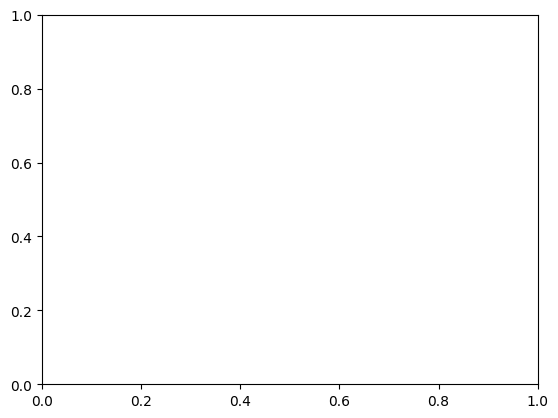

In [ ]:
plot_planar(p.b.G, p.b.embed)

## scratch work 